# Spherical waves

After we have had a look at plane waves, we can explore a second solution of the homogeneous wave equation - **Spherical Waves**. Spherical waves are elementary waves that are for example considered in Huygens principle. So if we develop some code to visualize spherical waves, we may also verify Huygens principle later.

In [563]:
import numpy as np
import matplotlib.pyplot as plt
from time import sleep,time
import matplotlib as mpl
import matplotlib.cm as cm


from ipycanvas import MultiCanvas, hold_canvas,Canvas

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# default values for plotting
plt.rcParams.update({'font.size': 12,
                     'axes.titlesize': 18,
                     'axes.labelsize': 16,
                     'axes.labelpad': 14,
                     'lines.linewidth': 1,
                     'lines.markersize': 10,
                     'xtick.labelsize' : 16,
                     'ytick.labelsize' : 16,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',}) 

## Equations

A spherical wave is as well described by two exponentials containing the spatial and temporal dependence of the wave. The only difference is, that the wavefronts shall describe spheres instead of planes. We therefore need $|\vec{k}||\vec{r}|=k r=const$. The product of the magntitudes of the wavevector and the distance from the source are constant. If we further generalize the position of the source to $\vec{r}_{0}$ we can write a spherical wave by 

\begin{equation}
E=\frac{E_{0}}{|\vec{r}-\vec{r}_{0}|}e^{i k|\vec{r}-\vec{r}_{0}|} e^{-i\omega t}
\end{equation}

Note that we have to introduce an additional scaling of the amplitude with the inverse distance of the source. This is due to energy conservation, as we require that all the energy that flows through all spheres around the source is constant.

In [480]:
def spherical_wave(k,omega,r,r0,t):
    k=np.linalg.norm(k)
    d=np.linalg.norm(r-r0)
    return( np.exp(1j*(k*d-omega*t))/d)

## Electric field

Lets have a look at the electric field of the spherical wave. Below is some code plotting the electric field is space. The source is at the origin and the plot nicely shows, that the amplitude decays with the distance.

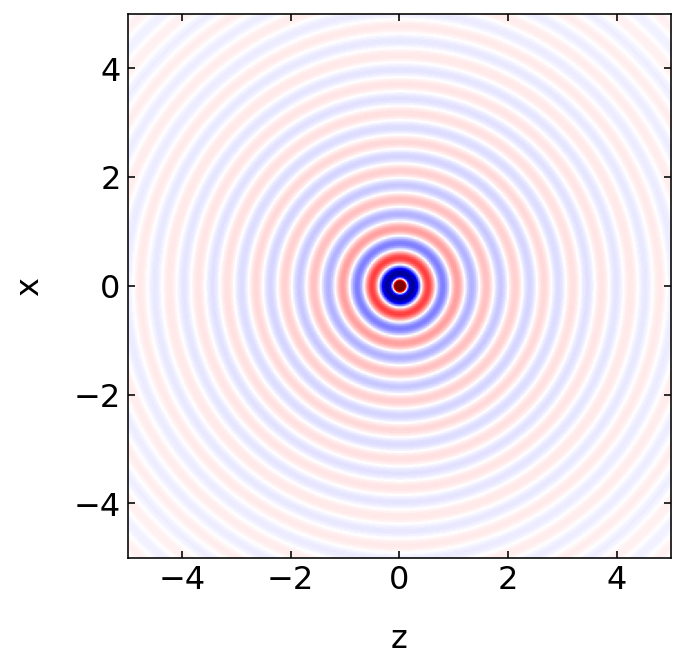

In [493]:
plt.figure(figsize=(5,5))

x=np.linspace(-5e-6,5e-6,300)
z=np.linspace(-5e-6,5e-6,300)

X,Z=np.meshgrid(x,z)
r=np.array([X,0,Z])

wavelength=532e-9
k0=2*np.pi/wavelength
c=299792458
omega0=k0*c

k=k0*np.array([0,0,1.])
r0=np.array([0,0,0])

field=spherical_wave(k,omega0,r,r0,0)

extent = np.min(z)*1e6, np.max(z)*1e6,np.min(x)*1e6, np.max(x)*1e6
bbb=plt.imshow(np.real(field.transpose()),extent=extent,vmin=-5e6,vmax=5e6,cmap='seismic')

plt.xlabel('z')
plt.ylabel('x')
plt.show()

The line plots below show that the field amplitude rapidly decays and the intensity follows a $1/r^2$ law as expected. The slight deiviation at small distances is an artifact from our discretization. We used the image above to extract the line plot and therefore never exactly hit $r=0$. 

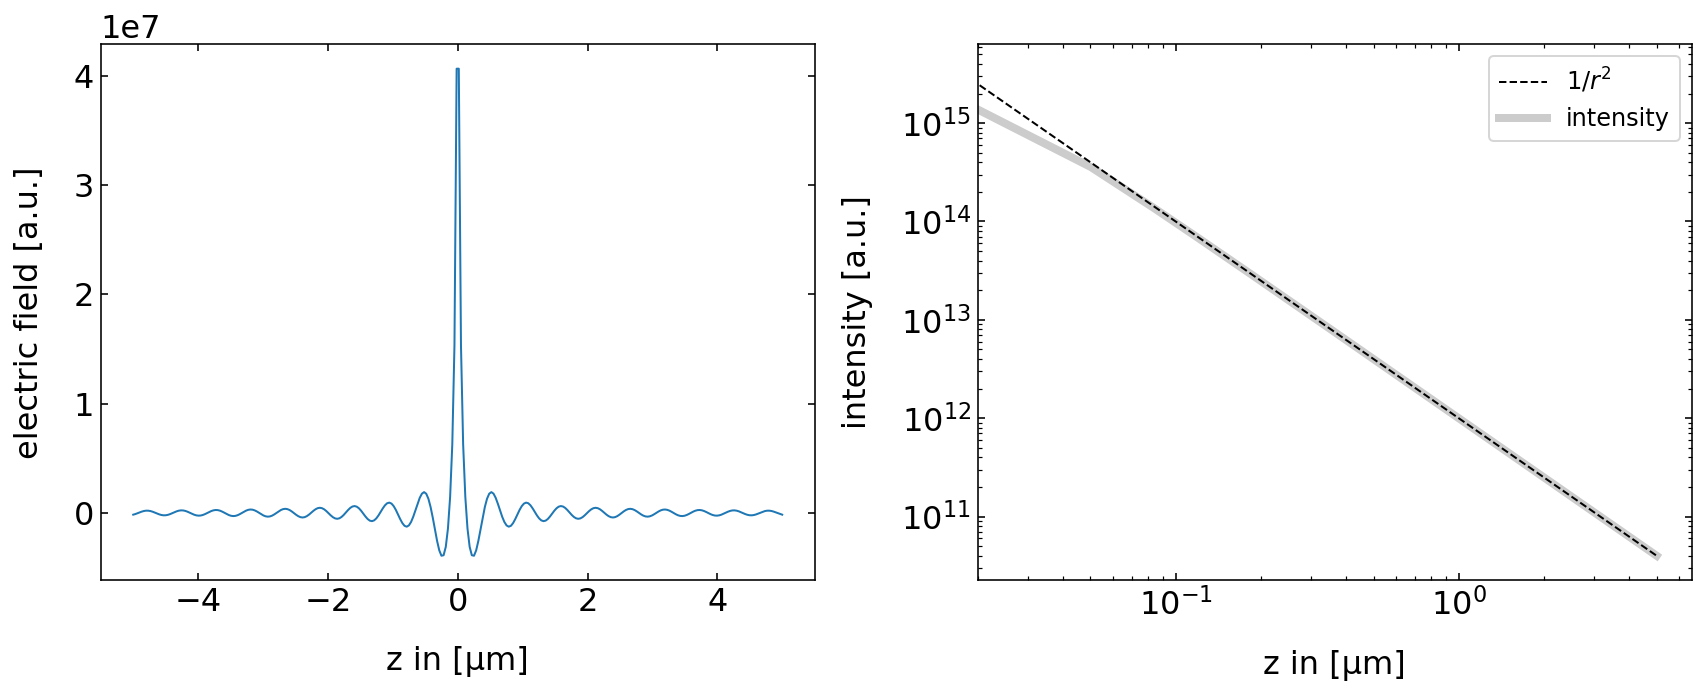

In [494]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(z*1e6,np.real(field.transpose()[150,:]))
plt.xlabel('z in [µm]')
plt.ylabel('electric field [a.u.]')


plt.subplot(1,2,2)
plt.loglog(z*1e6,1/(z**2),'k--',label='$1/r^2$')
plt.loglog(z*1e6,np.abs(field.transpose()[150,:])**2,color='k',alpha=0.2,lw=4,label='intensity')
plt.xlabel('z in [µm]')
plt.xlim(2e-2,)
plt.ylabel('intensity [a.u.]')
plt.legend()
plt.tight_layout()
plt.show()

## Animation

We can also visualize the animation our spherical wave to check for the direction of the wave propagation.

In [562]:
norm = mpl.colors.Normalize(vmin=-5e6, vmax=5e6)
cmap = cm.seismic
m = cm.ScalarMappable(norm=norm, cmap=cmap)

In [496]:
canvas = Canvas(width=300, height=300,sync_image_data=True)
display(canvas)

Canvas(height=300, sync_image_data=True, width=300)

In [497]:
def animate(k,time):
    for t in time:
        field=spherical_wave(k,omega0,r,r0,t)
        data=np.zeros([300,300,3])
        tmp=np.real(field.transpose())
        c=m.to_rgba(tmp)
        with hold_canvas(canvas):
            canvas.put_image_data(c[:,:,:3]*255,0,0)
        sleep(0.02)

In [498]:
time= np.linspace(0,1e-14,200)
animate(k,time)

## Plot the intensity in an image plane

As we have now the electric field in space, wqe may also chose an arbitrary plane in space to record the intensity of that wave in space. Here we want to know the intensity in a plane at 10 µm distance from the source, which is again at the origin. The intensity cross section at the screen is a Lorentzian function.

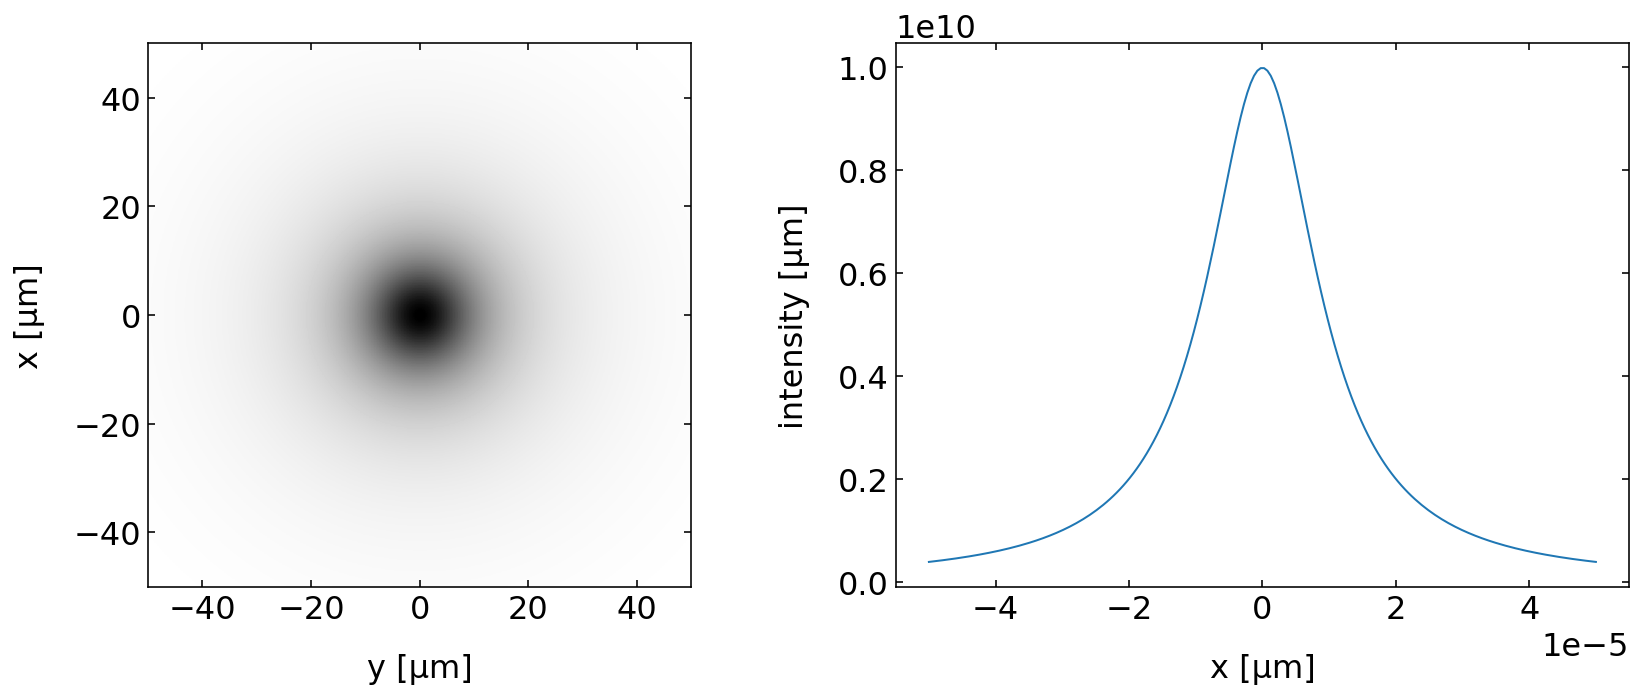

In [532]:
plt.figure(figsize=(12,5))
x=np.linspace(-50e-6,50e-6,200)
y=np.linspace(-50e-6,50e-6,200)

X,Y=np.meshgrid(x,y)
r=np.array([X,Y,10e-6])
k1=2*np.pi/wavelength*np.array([0j,0j,1+0j])
r0=np.array([0,0,0])
field=spherical_wave(k1,omega0,r,r0,0)

plt.subplot(1,2,1)
plt.imshow(np.abs(field)**2,extent=[-50,50,-50,50],cmap='gray_r')
plt.xlabel('y [µm]')
plt.ylabel('x [µm]')

plt.subplot(1,2,2)
plt.plot(x,np.abs(field[100,:])**2)
#plt.plot(x,3e10/((178000*x)**2+3))

plt.xlabel('x [µm]')
plt.ylabel('intensity [µm]')
plt.tight_layout()
plt.show()

## Interference between a spherical and a plane wave

In the section on plane waves, we had a look at the interference pattern of plane waves in space. We now have a look at the interference of a plane wave and a spherical wave. The plane wave thereby probes the distortion of the spherical wavefronts and the interference pattern stores this information on the shape of the spherical wavefronts. This is exactly what is done in holography. Taking this interference pattern as a "diffraction grating" will  allow you to restore information on the spherical wavefonts. 

In [560]:
def plane_wave(k,omega,r,t):    
    return(np.exp(1j*(np.dot(k,r)-omega*t)))

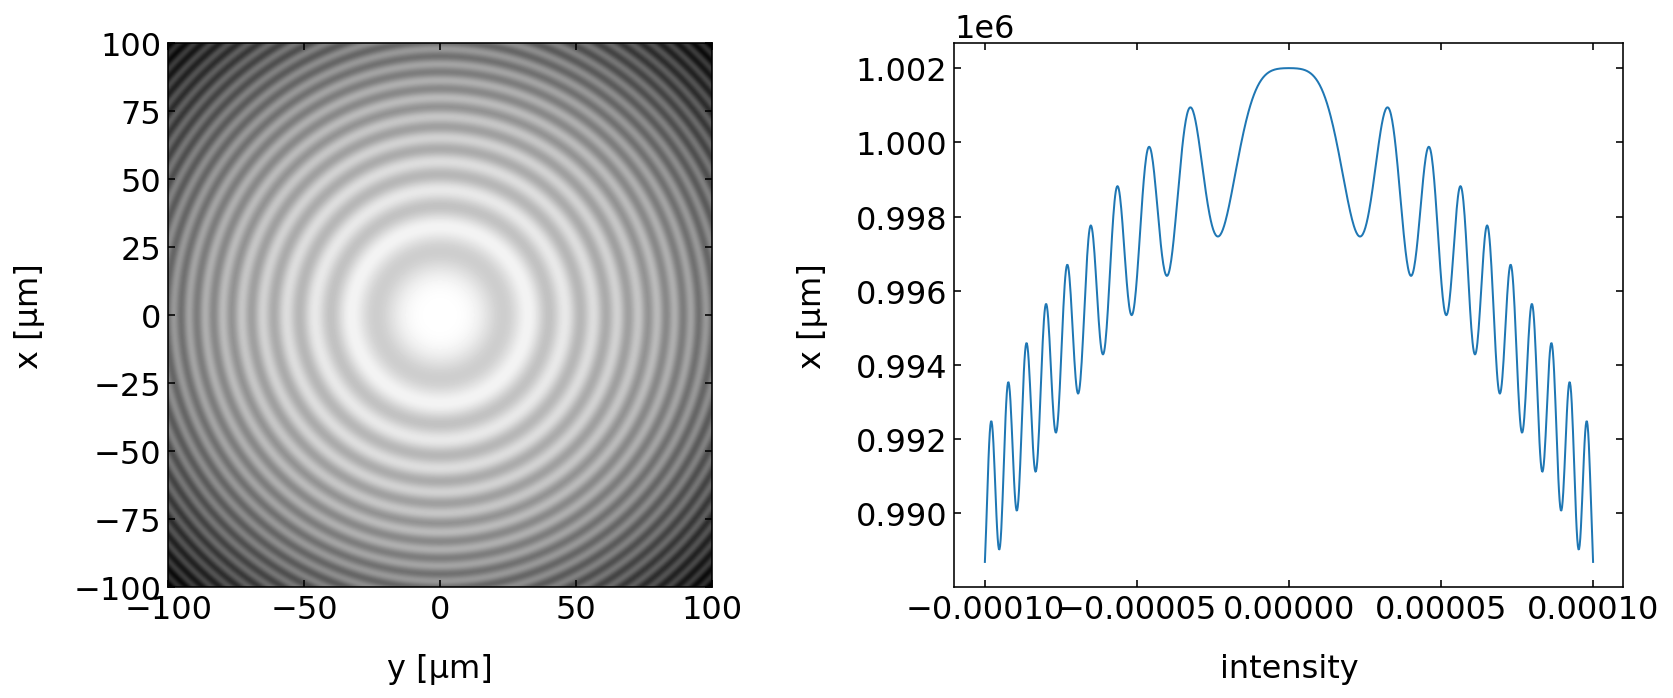

In [561]:
plt.figure(figsize=(12,5))
x=np.linspace(-100e-6,100e-6,1000)
y=np.linspace(-100e-6,100e-6,1000)

X,Y=np.meshgrid(x,y)
r=np.array([X,Y,1000e-6])
k1=2*np.pi/wavelength*np.array([0j,0j,1+0j])
r0=np.array([0,0,0])

field=plane_wave(k1,omega0,r,0)+spherical_wave(k1,omega0,r,r0,0)
extent = np.min(y)*1e6, np.max(y)*1e6,np.min(x)*1e6, np.max(x)*1e6
plt.subplot(1,2,1)
plt.imshow(np.abs(field.transpose())**2,extent=extent,cmap='gray')
plt.xlabel('y [µm]')
plt.ylabel('x [µm]')

plt.subplot(1,2,2)
plt.plot(x,np.abs(field[500,:])**2)

plt.xlabel('intensity')
plt.ylabel('x [µm]')

plt.tight_layout()
plt.show()
